<a href="https://colab.research.google.com/github/flediak/Euclid_IA_KP_paper0/blob/main/notebooks/plots_sample_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# install latex

In [1]:
!apt install texlive-latex-extra texlive-fonts-recommended dvipng cm-super

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  cm-super-minimal fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre ghostscript gsfonts javascript-common
  libcupsfilters1 libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpotrace0 libptexenc1 libruby2.5 libsynctex1
  libtexlua52 libtexluajit2 libzzip-0-13 lmodern pfb2t1c2pfb poppler-data
  preview-latex-style rake ruby ruby-did-you-mean ruby-minitest
  ruby-net-telnet ruby-power-assert ruby-test-unit ruby2.5
  rubygems-integration t1utils tex-common tex-gyre texlive-base
  texlive-binaries texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-generic tipa
Suggested packages:
  fonts-noto ghostscript-x apache2 | 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
def flux2mag (f):
    return -2.5 * np.log10(f) - 48.6

# SDSS main sample selection

### download data and read into pandas data frame

In [4]:
!gdown 1rRC6d8zCOk9NRfZbU4DiJgWeIS6eYOL2
!gdown 16-dP0c0LLQQxyY8oumB0nkIxbBgOm_yH

Downloading...
From: https://drive.google.com/uc?id=1rRC6d8zCOk9NRfZbU4DiJgWeIS6eYOL2
To: /content/sdss_nyu.csv.bz2
100% 12.8M/12.8M [00:00<00:00, 41.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=16-dP0c0LLQQxyY8oumB0nkIxbBgOm_yH
To: /content/sdss_fs2.csv.bz2
100% 7.02M/7.02M [00:00<00:00, 30.6MB/s]


In [5]:
data_nyu = pd.read_csv('sdss_nyu.csv.bz2')
data_fs2 = pd.read_csv('sdss_fs2.csv.bz2')

In [7]:
z_min_sdss_fit = 0.15 # minimum redshift used for fitting number density in FS2 to observations
dr_fs2_sdss = -0.15 # shift in absolute r-band magnitude in FS2, chosen to match observed number density above redshift z_min_sdss_fit

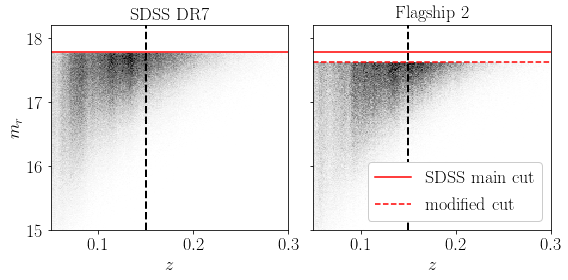

In [11]:
fig, ax = plt.subplots(1,2,figsize=(8,4), sharey=True, sharex=True)

fontsize=18

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('text', usetex=True)

m_bins = np.linspace(15,18.2,200)
z_bins = np.linspace(0.05,0.3,200)

ax[0].set_title('SDSS DR7', fontsize=fontsize)
ax[1].set_title('Flagship 2', fontsize=fontsize)

Nmin, Nmax = 0,1000

A_sdss= 7966. #see http://sdss.physics.nyu.edu/vagc/
A_oct = 5156.62 # 1 octant in deg^2
fA= A_sdss / A_oct

ax[0].hist2d(data_nyu.z, data_nyu.mr_nodust, bins=[z_bins,m_bins], cmin=Nmin*fA, cmax=Nmax*fA, cmap='Greys')
ax[1].hist2d(data_fs2.observed_redshift_gal, data_fs2.sdss_r_app_mag, 
             bins=[z_bins,m_bins], cmin=Nmin, cmax=Nmax, cmap='Greys')

for i in range(0,2):
    ax[i].axhline(y=17.77, c='r', label='SDSS main cut')

for i in range(0,2):
    ax[i].set_xlabel('$z$', fontsize=fontsize)
    ax[i].axvline(x=z_min_sdss_fit, linestyle='--', c='k', linewidth=2)


ax[0].set_ylabel('$m_r$', fontsize=fontsize)

dr_fs2_sdss = -0.15

ax[1].axhline(y=17.77+dr_fs2_sdss, c='r', linestyle='--', label='modified cut')

ax[1].legend(loc='lower right', fontsize=fontsize, framealpha=1.0)
plt.tight_layout()
plt.savefig('mr-z_fs2_sdss.png', dpi=400,bbox_inches='tight', pad_inches = 0.1)
plt.show()

# SDSS red-blue selection

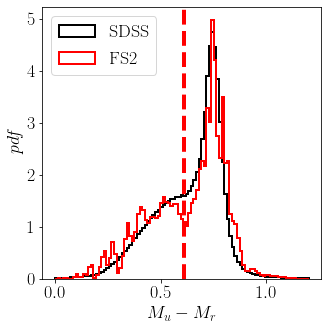

In [14]:
fig, ax = plt.subplots(1,1,figsize=(5,5))

fontsize=18

plt.rc('font', family='serif')
plt.rc('xtick', labelsize=fontsize)
plt.rc('ytick', labelsize=fontsize)
plt.rc('text', usetex=True)

gr_bins = np.linspace(0.0,1.2,100)

gr_nyu = data_nyu.Mg00 - data_nyu.Mr00
gr_fs2 = data_fs2.gr_restframe


gr_cut_fs2 = 0.61
gr_cut_nyu = 0.62
gr_cut_J19 = 0.66

ax.axvline(x=gr_cut_fs2,c='r', ls='--', lw=4)
#ax.axvline(x=gr_cut_nyu,c='k', ls='--', lw=2)
#ax.axvline(x=gr_cut_J19,c='b', ls='--', lw=2)

ax.hist(gr_nyu, bins=gr_bins, histtype='step', density=True, color='k', lw=2, label='SDSS')
ax.hist(gr_fs2, bins=gr_bins, histtype='step', density=True, color='r', lw=2, label='FS2')

ax.set_xlabel('$M_u-M_r$',fontsize=fontsize)
ax.set_ylabel('$pdf$',fontsize=fontsize)

ax.legend(fontsize=fontsize, loc='upper left')
plt.savefig('ur_fs2_sdss.png', dpi=400,bbox_inches='tight', pad_inches = 0.1)

plt.show()


# download plots

In [12]:
from google.colab import files

In [13]:
files.download('mr-z_fs2_sdss.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
files.download('ur_fs2_sdss.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>